In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl (385.0 MB)
  Using cached grpcio-1.66.2-cp310-cp310-win_amd64.whl (4.3 MB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl (126 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl (413 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached h5py-3.12.1-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.w


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt

In [5]:
pip install matplotlib


  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl (7.8 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-win_amd64.whl (55 kB)
     ---------------------------------------- 0.0/106.9 kB ? eta -:--:--
     ------------------------------------ - 102.4/106.9 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 106.9/106.9 kB 1.2 MB/s eta 0:00:00
  Using cached fonttools-4.54.1-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached contourpy-1.3.0-cp310-cp310-win_amd64.whl (216 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

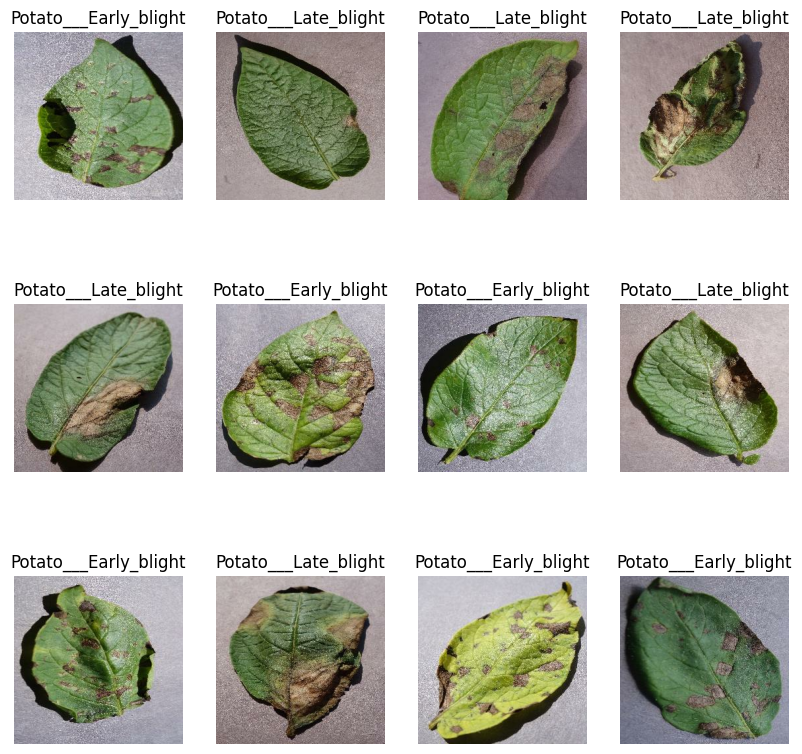

In [8]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
def get_dataset_partition_tf(ds,train_split = 0.8,val_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [24]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [25]:
len(train_ds)

54

In [26]:
len(val_ds)

6

In [28]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE,IMG_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [35]:
data_augementation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [40]:
input_shape =(BATCH_SIZE,IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape = input_shape)#for api build

C:\Users\sharo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [47]:

history = model.fit(
    train_ds,
    # epochs = 50,
    epochs = 10,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5197 - loss: 0.8909 - val_accuracy: 0.6875 - val_loss: 0.8475
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.6530 - loss: 0.7970 - val_accuracy: 0.8333 - val_loss: 0.4394
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.8158 - loss: 0.4311 - val_accuracy: 0.8438 - val_loss: 0.3544
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.8725 - loss: 0.3192 - val_accuracy: 0.8698 - val_loss: 0.2901
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.8946 - loss: 0.2557 - val_accuracy: 0.8281 - val_loss: 0.4432
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.8946 - loss: 0.2745 - val_accuracy: 0.9167 - val_loss: 0.2055
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.9470 - loss: 0.1565 - val_accuracy: 0.9479 - val_loss: 0.1044
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9447 - loss: 0.1375 - val_accuracy: 0.9219 - v

In [48]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 722ms/step - accuracy: 0.9881 - loss: 0.0524


[0.062002021819353104, 0.984375]

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [52]:
history.history['accuracy']

[0.5434027910232544,
 0.6799768805503845,
 0.8234953880310059,
 0.8703703880310059,
 0.8969907164573669,
 0.9108796119689941,
 0.9525462985038757,
 0.9375,
 0.9583333134651184,
 0.9826388955116272]

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

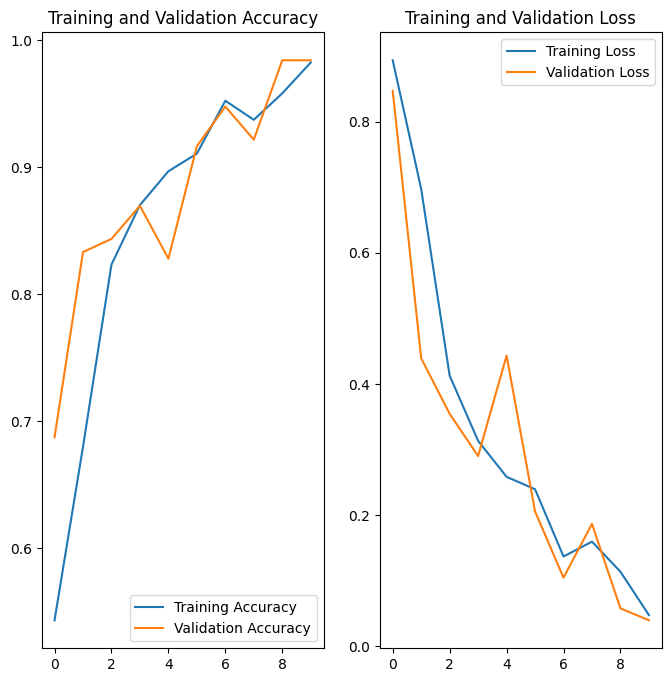

In [55]:
EPOCHS = 10
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
predicted label: Potato___Early_blight


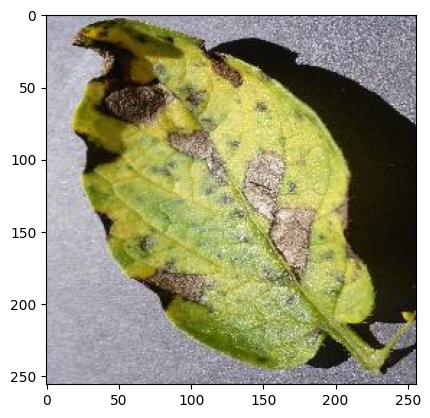

In [57]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [59]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


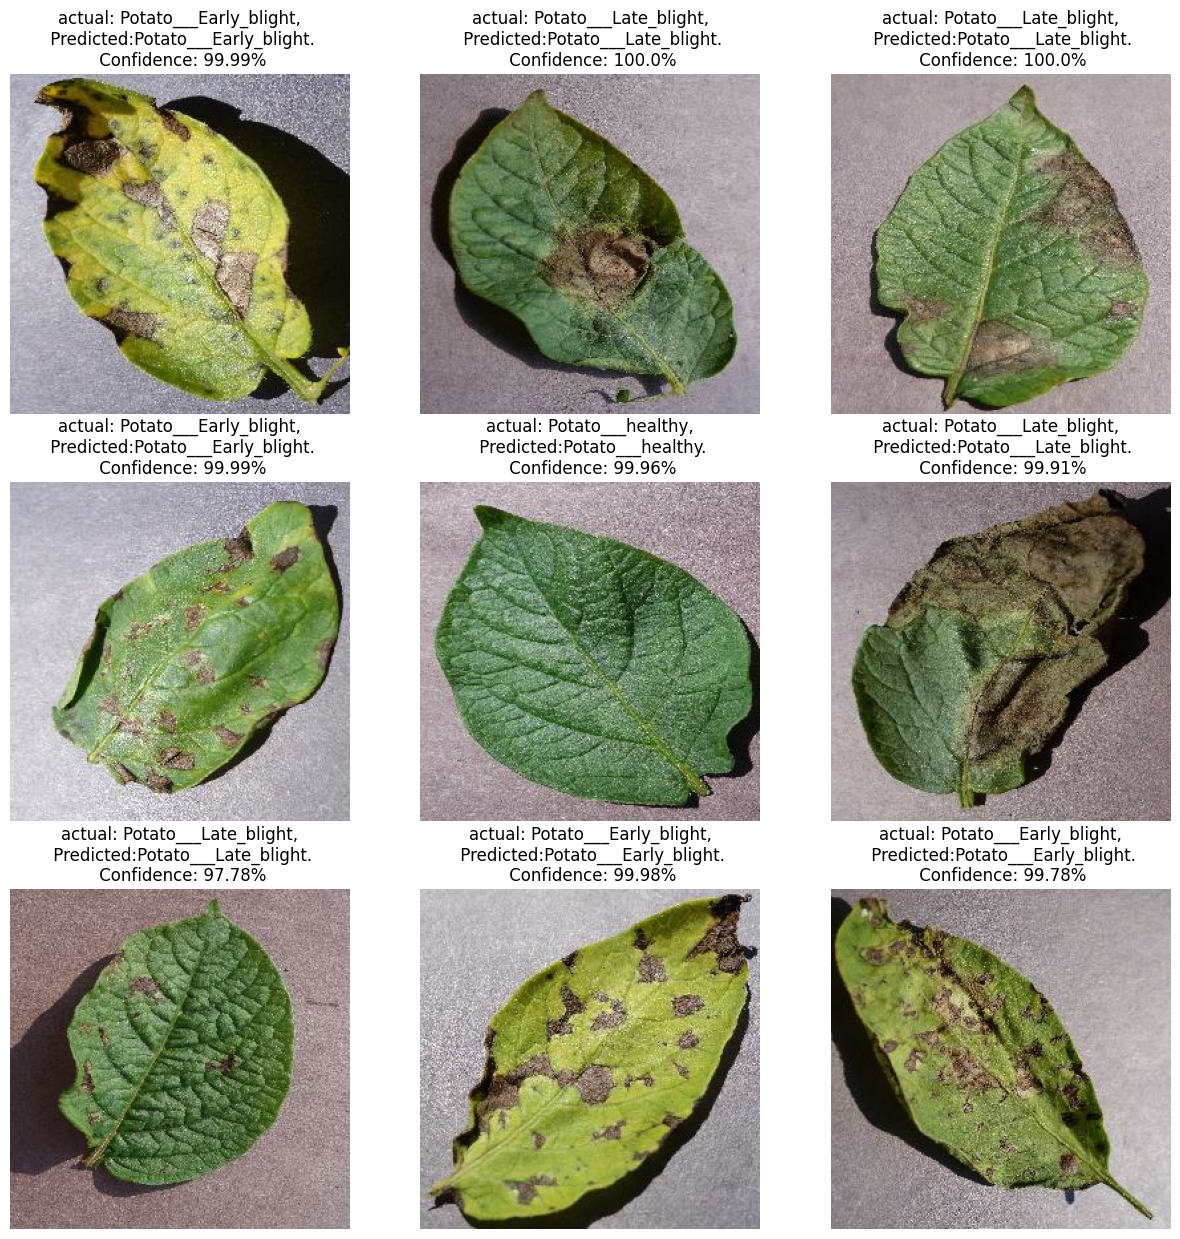

In [61]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
     for i in range(9):
         ax = plt.subplot(3,3,i+1)
         plt.imshow(images[i].numpy().astype("uint8"))
         predicted_class,confidence = predict(model,images[i].numpy())
         actual_class = class_names[labels[i]]
         plt.title(f"actual: {actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
         plt.axis("off")

In [72]:
import os

# Get the highest model version number from the filenames, excluding the .h5 extension
model_version = max([int(i.split(".")[0]) for i in os.listdir("../models") if i.endswith(".h5")] + [0]) + 1

# Save the model with the new version number
model.save(f"../models/{model_version}.h5")


In [69]:
model.save("../potatoes.h5")

In [68]:
model_version = 1
model.save(f"../models/{model_version}.h5")